In [3]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
import keras.backend as k
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf

In [6]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


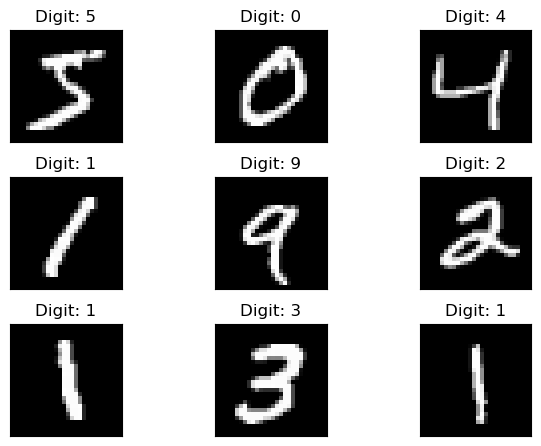

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap = 'gray',interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [10]:
x_train.shape

(60000, 28, 28)

In [14]:
img_rows,img_cols = 28,28
X_train = x_train.reshape(x_train.shape[0], img_rows ,img_cols,1)
X_test = x_test.reshape(x_test.shape[0] , img_rows,img_cols , 1)
input_shape = (img_rows , img_cols , 1)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print('x_train shape:',X_train.shape)

x_train shape: (60000, 28, 28, 1)


In [21]:
num_category = 10
input_shape = (img_rows ,imag_cols , 1)

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32 , kernel_size = (3,3) , activation = 'relu' , input_shape = input_shape))
## 32 convolutional filters used each of size 3x3
#again
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
## 64 convolutional filters are used eah size of 3x3
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) , strides = 2))
#randomly turn neurons on and off to improve convergence
model.add(tf.keras.layers.Dropout(0.25))
## flatten since too many dimension , we only want a classification output
model.add(tf.keras.layers.Flatten())
## fully connected to get all relevent data
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# one more dropout  for convergence shake:
model.add(tf.keras.layers.Dropout(0.5))
## output a softmax to squansh the matrix into output probablities
model.add(tf.keras.layers.Dense(num_category,activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [31]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy ,optimizer = tf.keras.optimizers.Adadelta(),metrics = ["accuracy"])

In [32]:
batch_size = 128
num_epochs = 10
model_log = model.fit(X_train , y_train , batch_size = batch_size , epochs = num_epochs , verbose = 1,validation_data = (X_test , y_test))

Epoch 1/10
469/469 [==============================] - 62s 129ms/step - loss: 2.3024 - accuracy: 0.1318 - val_loss: 2.3023 - val_accuracy: 0.1845
Epoch 2/10
469/469 [==============================] - 60s 128ms/step - loss: 2.3023 - accuracy: 0.1651 - val_loss: 2.3023 - val_accuracy: 0.2256
Epoch 3/10
469/469 [==============================] - 60s 127ms/step - loss: 2.3023 - accuracy: 0.1744 - val_loss: 2.3022 - val_accuracy: 0.2101
Epoch 4/10
469/469 [==============================] - 60s 129ms/step - loss: 2.3022 - accuracy: 0.1661 - val_loss: 2.3022 - val_accuracy: 0.1355
Epoch 5/10
469/469 [==============================] - 60s 127ms/step - loss: 2.3022 - accuracy: 0.1528 - val_loss: 2.3022 - val_accuracy: 0.1142
Epoch 6/10
469/469 [==============================] - 60s 128ms/step - loss: 2.3022 - accuracy: 0.1448 - val_loss: 2.3021 - val_accuracy: 0.1137
Epoch 7/10
469/469 [==============================] - 60s 127ms/step - loss: 2.3022 - accuracy: 0.1339 - val_loss: 2.3021 - val_ac

In [33]:
model.layers

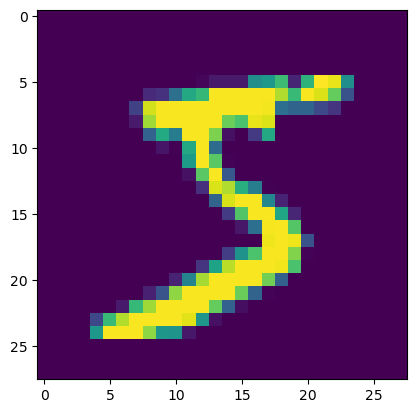

In [34]:
plt.imshow(x_train[0][:,:,0])

1/1 [==============================] - 0s 62ms/step


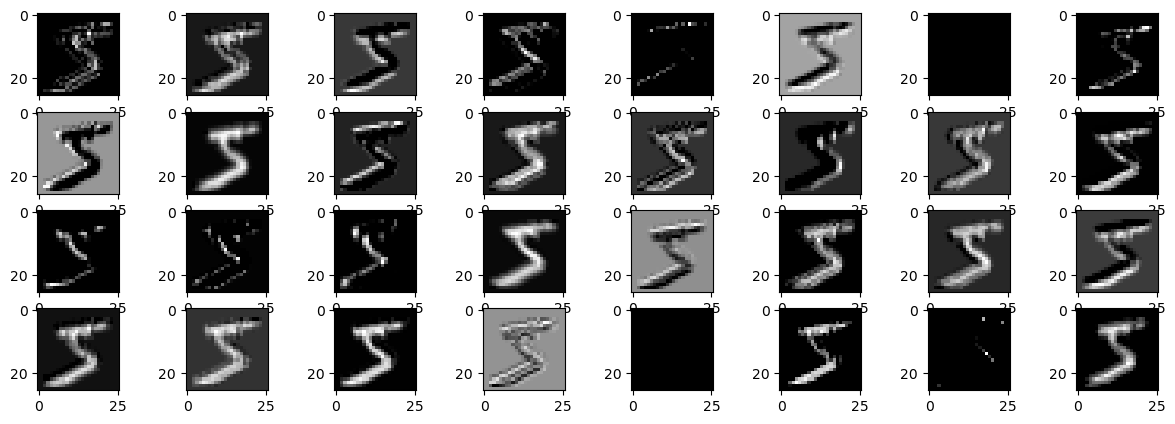

In [42]:
models2 = tf.keras.models.Model(inputs = model.inputs,outputs = model.layers[0].output)
features_maps = models2.predict(X_train[0:1])
plt.figure(figsize = (15,10))
for i in range(features_maps.shape[-1]):
    plt.subplot(8,8,i+1)
    plt.imshow(features_maps[0][:,:,i],cmap="gray")
plt.show()

1/1 [==============================] - 0s 76ms/step


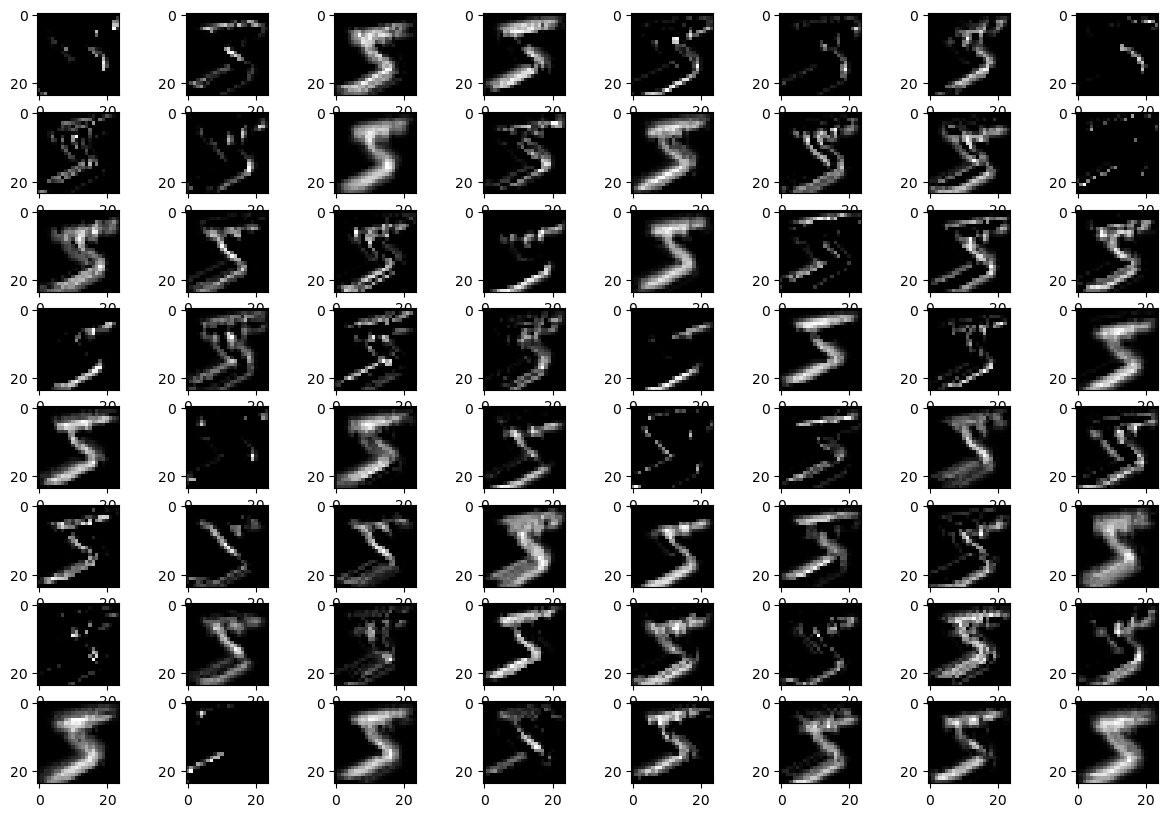

In [44]:
model2 = tf.keras.models.Model(inputs = model.inputs,outputs = model.layers[1].output)
feature_maps = model2.predict(x_train[0:1])
plt.figure(figsize = (15,10))
for i in range(feature_maps.shape[-1]):
    plt.subplot(8,8,i+1)
    plt.imshow(feature_maps[0][:,:,i] , cmap = "gray")
plt.show()